# Intro to Python and Data
In this overview we are going to walk through some basic principles of programming in python as well as exporing data.

### Goals
We will be working with data about tv shows and exploring the data to find some interesting patterns.

# Step 1: Loading Data

In [1]:
### LOAD DATA ###
import requests

pages = []

### NOTE: abide by 10 request per 10 sec cap ###
for p in range(9):
    pages.append(
        requests.get(f'http://api.tvmaze.com/shows?page={p}')
    )

# Step 2: Transforming Data

In [2]:
pages[0].json()[0]

{'id': 1,
 'url': 'http://www.tvmaze.com/shows/1/under-the-dome',
 'name': 'Under the Dome',
 'type': 'Scripted',
 'language': 'English',
 'genres': ['Drama', 'Science-Fiction', 'Thriller'],
 'status': 'Ended',
 'runtime': 60,
 'premiered': '2013-06-24',
 'officialSite': 'http://www.cbs.com/shows/under-the-dome/',
 'schedule': {'time': '22:00', 'days': ['Thursday']},
 'rating': {'average': 6.5},
 'weight': 92,
 'network': {'id': 2,
  'name': 'CBS',
  'country': {'name': 'United States',
   'code': 'US',
   'timezone': 'America/New_York'}},
 'webChannel': None,
 'externals': {'tvrage': 25988, 'thetvdb': 264492, 'imdb': 'tt1553656'},
 'image': {'medium': 'http://static.tvmaze.com/uploads/images/medium_portrait/81/202627.jpg',
  'original': 'http://static.tvmaze.com/uploads/images/original_untouched/81/202627.jpg'},
 'summary': "<p><b>Under the Dome</b> is the story of a small town that is suddenly and inexplicably sealed off from the rest of the world by an enormous transparent dome. The

In [3]:
### SETUP OBJECTS ###

class Lang:
    languages = []
    def add(self, lang):
        if lang not in self.languages:
            self.languages.append(lang)

    def getidx(self, lang):
        if lang in self.languages:
            return self.languages.index(lang)
lang_tracker = Lang()

### Dataframes
Objects representing tables with columns

![](https://cdn-images-1.medium.com/max/1600/1*JjZYjvyBurwgQa1RBRtzAA.png)

In [4]:
### TRANSFORMING ###
"""
    LEARNING
    - pandas
    - data exploration
    - dataset filtering
"""
import pandas as pd

d_detail = {
    'name': [],
    'rating': [],
    'genres': [],
    'runtime': [],
    'day': [],
    'lang': [],
    'premiered': []
}

d_genres = {
    'genre': [],
    'rating': []
}

# Move data into pandas dataframe
for page in pages:
    for show in page.json():

        ### General Row Populating ###
        d_detail['name'].append(show['name'])
        d_detail['rating'].append(show['rating']['average'])
        d_detail['runtime'].append(show['runtime'])
        d_detail['premiered'].append(show['premiered'])
        
        d_detail['genres'].append(str(show['genres']))
        
        ### LANGUAGES ###
        d_detail['lang'].append(show['language'])
    
        if len(show['schedule']['days']) > 0:
            d_detail['day'].append(
                getattr(Days, show['schedule']['days'][0]).value
            )
        else:
            d_detail['day'].append(-1)
        
        ### Populate Genre Dictionary ###
        for g in show['genres']:
            d_genres['genre'].append(g)
            d_genres['rating'].append(show['rating']['average'])
    
# Remove NaN's
# df_genres = pd.DataFrame(d_genres)
df_genres = pd.DataFrame(d_genres).dropna()

# Fill NaNs
# df = pd.DataFrame(d_detail)
df_detail = pd.DataFrame(d_detail).dropna(0)

# show languages found
# lang_tracker.languages

NameError: name 'Days' is not defined

# Step 3: Explore Data

In [11]:
len(df)

1391

In [71]:
df_detail.head(7)

,name,rating,genres,runtime,day,lang,premiered
0,Under the Dome,6.5,"['Drama', 'Science-Fiction', 'Thriller']",60.0,5,English,2013-06-24
1,Person of Interest,9.0,"['Action', 'Crime', 'Science-Fiction']",60.0,3,English,2011-09-22
2,Bitten,7.6,"['Drama', 'Horror', 'Romance']",60.0,6,English,2014-01-11
3,Arrow,7.5,"['Drama', 'Action', 'Science-Fiction']",60.0,3,English,2012-10-10
4,True Detective,8.2,"['Drama', 'Crime', 'Thriller']",60.0,1,English,2014-01-12
5,The 100,7.9,"['Action', 'Adventure', 'Science-Fiction']",60.0,3,English,2014-03-19
6,Homeland,8.2,"['Drama', 'Thriller', 'Espionage']",60.0,1,English,2011-10-02


In [20]:
# look at top genre combinations by rating
df_detail.groupby(['genres']).mean().sort_values(by=['rating'], ascending=False).head(10)

,rating,runtime,day,lang
genres,,,,
"['Crime', 'Medical']",9.5,60.0,5.0,0.0
"['Adventure', 'Science-Fiction', 'Western']",9.2,60.0,6.0,0.0
"['Adventure', 'Mystery', 'Supernatural']",9.1,45.0,2.5,0.0
"['Fantasy', 'Horror', 'Mystery']",9.1,30.0,6.0,0.0
"['Science-Fiction', 'Mystery']",9.1,50.0,1.0,0.0
"['Drama', 'Science-Fiction', 'War']",9.0,60.0,6.0,0.0
"['Action', 'Thriller', 'Espionage']",9.0,60.0,2.0,9.0
"['Drama', 'Mystery', 'Medical']",9.0,60.0,2.0,0.0
"['Drama', 'Mystery']",9.0,30.0,2.0,0.0


In [22]:
df_genres.groupby(['genre'], as_index=False).mean().sort_values(by=['rating'], ascending=False)

,genre,rating
26,War,8.240909
25,Travel,8.080000
27,Western,8.042857
13,History,8.038710
6,Crime,8.028044
9,Espionage,8.006250
18,Mystery,7.914444
7,DIY,7.900000
3,Anime,7.897826
2,Adventure,7.889189


In [26]:
### ANALYSIS ###
from scipy import stats
from numpy import mean

stats.describe(df_detail['rating'])

DescribeResult(nobs=1391, minmax=(3.3, 9.8), mean=7.719698058950396, variance=0.7646045130825607, skewness=-0.8669852141933502, kurtosis=1.6705697075390349)

# Step 4: Visualize

In [50]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

In [34]:
# df_genres.sort_values(by=['rating'], ascending=True)

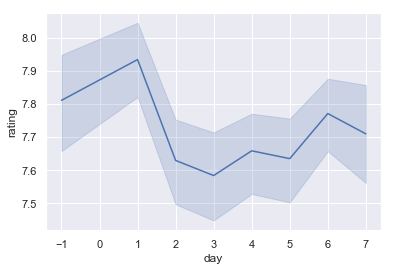

In [51]:
ax = sns.lineplot(x="day", y="rating", data=df_detail)

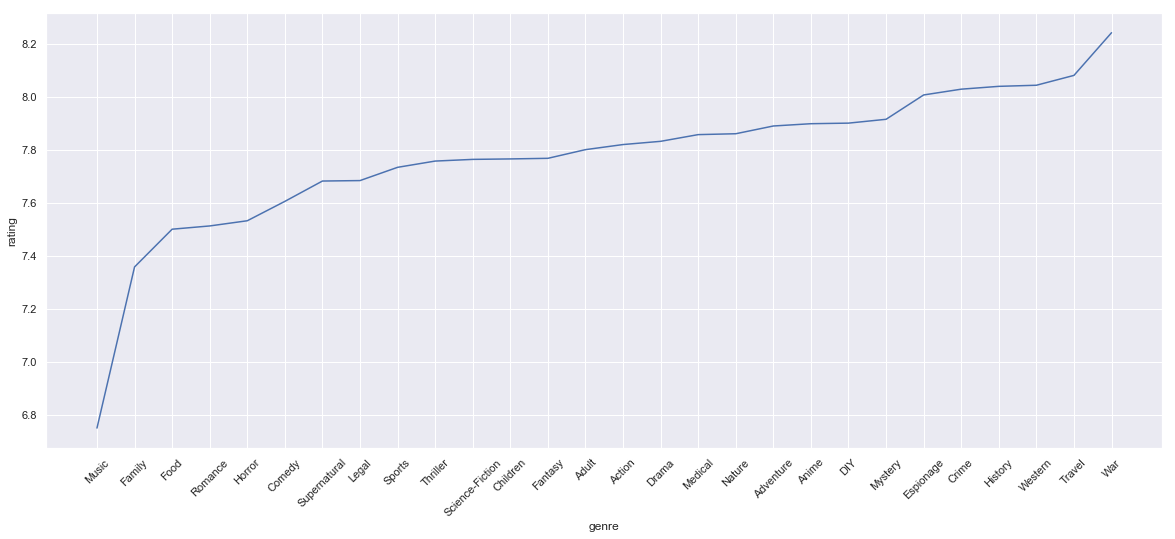

In [93]:
plt.subplots(1, 1, figsize=(20, 8), sharex=False)
plt.xticks(rotation=45)
sns.lineplot(
    x="genre", 
    y="rating",
    sort=False,
    data=df_genres.groupby(['genre'], as_index=False).mean().sort_values(by=['rating'], ascending=True)
)

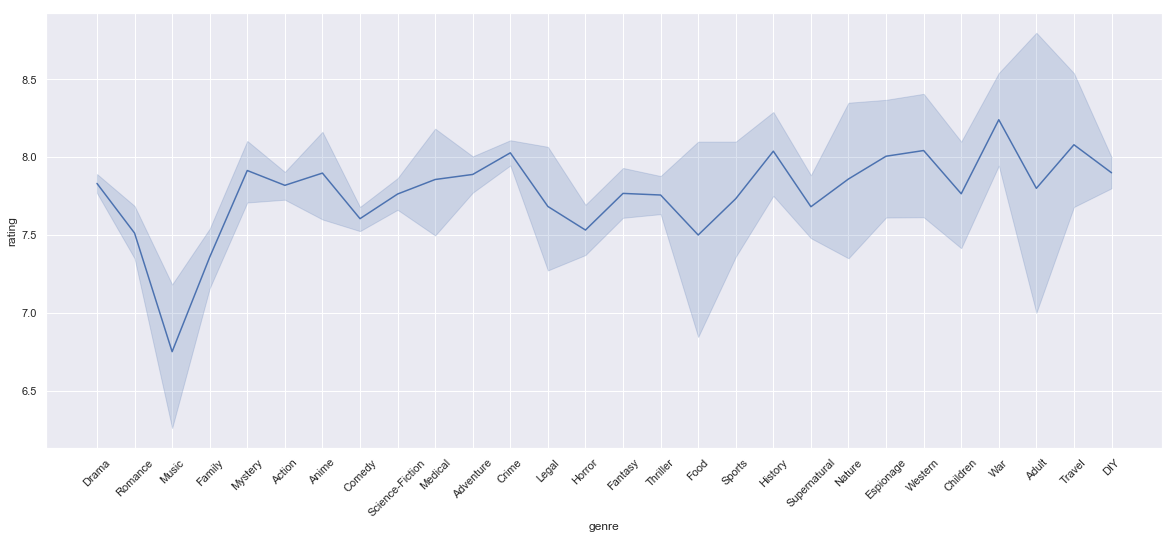

In [94]:
plt.subplots(1, 1, figsize=(20, 8), sharex=False)
plt.xticks(rotation=45)
sns.lineplot(
    x="genre", 
    y="rating",
    sort=False,
    data=df_genres.sort_values(by=['rating'], ascending=True)
)

In [132]:
from bokeh.io import output_file, show, output_notebook
from bokeh.models import HoverTool
from bokeh.plotting import figure, ColumnDataSource
import numpy as np

p = figure(title="Hexbin for Genre / Rating", 
           match_aspect=True,
           tools="wheel_zoom,reset,pan,lasso_select,box_select", 
           background_fill_color='#440154', 
           toolbar_location="below"
          )
p.grid.visible = False

class Genres:
    col = []
    def add(self, v):
        if v not in self.col:
            self.col.append(v)
    @property
    def genre_idx(self):
        return [i for i in range(len(self.col))]
    
    def get(self, v):
        return self.col.index(v)
    
g_list = Genres()
genre_idx_list = []
for genre in df_genres['genre']:
    g_list.add(genre)
    genre_idx_list.append(g_list.get(genre))
    
    
df_genres['idx'] = pd.Series(genre_idx_list, index=df_genres.index)

source = ColumnDataSource(data=dict(
    idx=df_genres['idx'],
    rating=df_genres['rating'],
    genre=df_genres['genre']
))

r, bins = p.hexbin(x=df_genres['idx'],
                   y=df_genres['rating'], 
                   size=0.5, 
                   hover_color="pink", 
                   hover_alpha=0.8
                  )

p.circle('idx', 'rating', color="white", size=1, source=source)

p.add_tools(HoverTool(
    tooltips=[
        ("count", "@c"), 
        ("(idx,rating)", "($x, $y)"),
        ("genre", "@genre"),
        ("(q,r)", "(@q, @r)")
    ],
    mode="mouse", point_policy="follow_mouse", renderers=[r]
))
print(g_list.col)
output_notebook()
show(p)

['Drama', 'Science-Fiction', 'Thriller', 'Action', 'Crime', 'Horror', 'Romance', 'Adventure', 'Espionage', 'Music', 'Mystery', 'Supernatural', 'Fantasy', 'Family', 'Anime', 'Comedy', 'History', 'Medical', 'Legal', 'Western', 'War', 'Sports', 'Food', 'Travel', 'Children', 'Adult', 'Nature', 'DIY']


Loading BokehJS ...

In [113]:
df_genres

,genre,rating,idx
0,Drama,6.5,0
1,Science-Fiction,6.5,1
2,Thriller,6.5,2
3,Action,9.0,3
4,Crime,9.0,4
5,Science-Fiction,9.0,1
6,Drama,7.6,0
7,Horror,7.6,5
8,Romance,7.6,6
9,Drama,7.5,0


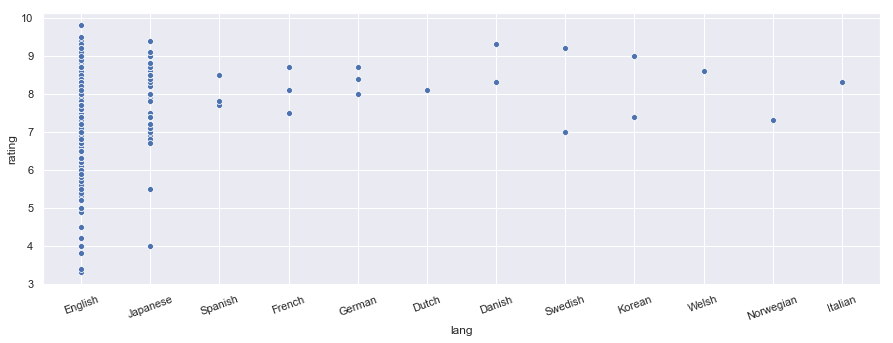

In [57]:
plt.subplots(1, 1, figsize=(15, 5), sharex=False)
plt.xticks(rotation=20)
ax = sns.scatterplot(x="lang", y="rating", data=df_detail)

# Drawing Conclusions

### Potential Factors for Lower Show Ratings
- Showtimes on Tue / Sat
- Genre of Romance, Music, Legal

In [42]:
data = requests.get("http://api.tvmaze.com/search/shows?q=sing")
# data.json()

In [43]:
for show in data.json():
    print(f"{show['show']['name']} -- {show['show']['rating']}")

Sing It! -- {'average': None}
The Sing-Off -- {'average': None}
Dr. Horrible's Sing-Along Blog -- {'average': 8.2}
Sing If You Can -- {'average': None}
Sing Your Face Off -- {'average': None}
Sing: Ultimate A Cappella -- {'average': None}
People Who Sing Together -- {'average': None}
Sing It On -- {'average': None}
Let's Sing and Dance for Comic Relief -- {'average': None}
The Shaolin Warriors -- {'average': None}
